# Determination of a promising tariff for a telecom company
## Description of the project
Customers of Megaline, a federal mobile operator, are offered two tariff plans: Smart and Ultra. In order to adjust the advertising budget, the commercial department wants to understand which tariff brings the most money.
A preliminary analysis of tariffs was made for a small sample of customers - data from 500 Megaline users: who they are, where they are from, what tariff they use, how many calls and messages each sent in 2018. The behavior of customers was analyzed and a conclusion was made - which tariff is better.
### Description of tariffs
#### Tariff "Smart"
1.	Monthly fee: 550 rubles
2.	Includes 500 minutes of talk time, 50 messages and 15 GB of Internet traffic
3.	The cost of services in excess of the tariff package: 1) minute of conversation: 3 rubles; 2) message: 3 rubles; 3) 1 GB of Internet traffic: 200 rubles.
#### Tariff "Ultra"
1.	Monthly fee: 1950 rubles
2.	Includes 3000 minutes of talk time, 1000 messages and 30 GB of Internet traffic
3.	The cost of services in excess of the tariff package: 1) minute of conversation: 1 rubles; 2) message: 1 rubles; 3) 1 GB of Internet traffic: 150 rubles.
##### Note:
Megaline always rounds seconds to minutes, and megabytes to gigabytes. Each call is rounded off separately: even if it lasted only 1 second, it will be counted as 1 minute.
For web traffic, individual sessions are not counted. Instead, the monthly total is rounded up. If the subscriber uses 1025 megabytes this month, they will be charged for 2 gigabytes.

## Step 1. Open the data file and study the general information

In [79]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sb
from scipy import stats as st

pd.set_option('chained_assignment', None)

calls = pd.read_csv('C:/Users/Python.DESKTOP-UVK4GV4/Desktop/python/calls.csv')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [80]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [81]:
internet = pd.read_csv('C:/Users/Python.DESKTOP-UVK4GV4/Desktop/python/internet.csv') 
internet.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [82]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [83]:
messages = pd.read_csv('C:/Users/Python.DESKTOP-UVK4GV4/Desktop/python/messages.csv') 
messages.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [84]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [85]:
tariffs = pd.read_csv('C:/Users/Python.DESKTOP-UVK4GV4/Desktop/python/tariffs.csv') 
tariffs.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [86]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [87]:
users = pd.read_csv('C:/Users/Python.DESKTOP-UVK4GV4/Desktop/python/users.csv')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [88]:
users.tail()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


All 5 files are open, they all contain different information and have a different number of columns. The only gaps are in the file *users* in the column **churn_date**.

## Step 2. Prepare the data
- Cast the data to the required types;
- Find and correct data errors, where it is necessary.

In [89]:
#id in the files calls, internet, messages are converted to integer type

calls['id'] = calls['id'].astype(int)
internet['id'] = internet['id'].astype(int)
messages['id'] = messages['id'].astype(int)

In [90]:
#columns with dates in the files calls, internet, messages, users are given to the date format

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [91]:
#all values are rounded up (since the tariff is calculated by minutes)
#0 values are replaced by 1

calls['duration'] = calls['duration'].apply(np.ceil)
calls.loc[calls['duration'] == 0, 'duration'] = 1

In [92]:
##all values are rounded up (since the tariff is calculated by megabytes)
#0 values are replaced by 1

internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet.loc[internet['mb_used'] == 0, 'mb_used'] = 1

#### Data type and gaps
1. **id** are converted to integer type in the files *calls, internet, messages*;
2. Columns with **dates** in the files *calls, internet, messages, users* are given to the date format;
3. Call duration and Internet traffic values are rounded up, zeros are replaced by 1.

There are a lot of gaps in the *users* file in the **churn_date** column and it is not possible to fill them in, let's leave it as it is.

#### Calculate for each user:
- the number of calls made and spent minutes of conversation by months;
- number of sent messages by month;
- the volume of consumed Internet traffic by months;
- monthly revenue from each user (subtract the free limit from the total number of calls, messages and Internet traffic; multiply the remainder by the value from the tariff plan; add the subscription fee corresponding to the tariff plan).

In [93]:
#number of calls made and spent minutes of conversation by months

call_min_pro_month = calls.groupby([calls['user_id'], calls['call_date']
                                      .dt.month.rename('month')]).agg({'duration':['count','sum']})

call_min_pro_month.columns=['count_call', 'dur_call']

In [94]:
#number of messages sent by month

mess_pro_month = messages.groupby([messages['user_id'], messages['message_date']
                                      .dt.month.rename('month')]).agg({'user_id':['count']})

mess_pro_month.columns=['count_mess']

In [95]:
#Internet traffic consumed by months

int_pro_month = internet.groupby([internet['user_id'], internet['session_date']
                                      .dt.month.rename('month')]).agg({'mb_used':['sum']})

int_pro_month.columns=['sum_int']

In [96]:
#create a resulting table with calculated values

result = [call_min_pro_month['count_call'], 
          call_min_pro_month['dur_call'], 
          mess_pro_month['count_mess'], 
          int_pro_month['sum_int']]

res_table = pd.concat(result, axis=1)
res_table.reset_index(inplace=True)

In [97]:
#missing values are replaced with zeros

res_table.loc[res_table['count_call'].isna(), 'count_call'] = 0
res_table.loc[res_table['dur_call'].isna(), 'dur_call'] = 0
res_table.loc[res_table['count_mess'].isna(), 'count_mess'] = 0
res_table.loc[res_table['sum_int'].isna(), 'sum_int'] = 0

In [98]:
#add the name of the tariff used for each user

total = res_table.merge(users, on = 'user_id', how = 'right').drop(['churn_date', 'first_name', 'last_name', 'reg_date'], axis=1)

In [99]:
#function of calculating revenue from each user per month

def det_revenue(row):
    duration = row['dur_call']
    messages = row['count_mess']
    mb_used = row['sum_int']
    tariff = row['tariff']
        
    if tariff == 'ultra':
        extra_dur = duration - tariffs.loc[1, 'minutes_included']
        extra_mess = messages - tariffs.loc[1, 'messages_included']
        extra_int = mb_used - tariffs.loc[1, 'mb_per_month_included']

        if extra_dur < 0:
            extra_dur = 0
        if extra_mess < 0:
            extra_mess = 0
        if extra_int < 0:
            extra_int = 0
    
        return(extra_dur * tariffs.loc[1, 'rub_per_minute'] +
               extra_mess * tariffs.loc[1, 'rub_per_message'] +
               extra_int * (tariffs.loc[1, 'rub_per_gb'] / 1024) +
               tariffs.loc[1, 'rub_monthly_fee'])
    else:
        extra_dur = duration - tariffs.loc[0, 'minutes_included']
        extra_mess = messages - tariffs.loc[0, 'messages_included']
        extra_int = mb_used - tariffs.loc[0, 'mb_per_month_included']

        if extra_dur < 0:
            extra_dur = 0
        if extra_mess < 0:
            extra_mess = 0
        if extra_int < 0:
            extra_int = 0
    
        return(extra_dur * tariffs.loc[0, 'rub_per_minute'] +
               extra_mess * tariffs.loc[0, 'rub_per_message'] +
               extra_int * (tariffs.loc[0, 'rub_per_gb'] / 1024) +
               tariffs.loc[0, 'rub_monthly_fee'])

In [100]:
total['revenue'] = total.apply(det_revenue, axis=1)

## Step 3. Analyze the data
- Describe the behavior of the operator's customers based on the sample. 
- How many minutes of conversation, how many messages and how much Internet traffic do users of each tariff need per month?
- Calculate the mean, variance, and standard deviation.
- Plot histograms.
- Describe the distributions.

In [101]:
#How many minutes of conversation, how many messages and how much Internet traffic 
#do users of each tariff need per month?

medians = total.pivot_table(index='user_id', values=['dur_call', 'count_mess', 'sum_int'], aggfunc='median').merge(users, on = 'user_id', how = 'right').drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis=1)

In [102]:
#calculate the mean, variance and standard deviation

statistic = medians.pivot_table(index='tariff', values=['dur_call', 'count_mess', 'sum_int'], aggfunc={'dur_call': [np.median, np.var, np.std], 'sum_int': [np.median, np.var, np.std], 'count_mess': [np.median, np.var, np.std]}).round(2)
statistic.reset_index(inplace=True)

smart = medians[medians['tariff'] == 'smart']
ultra = medians[medians['tariff'] == 'ultra']

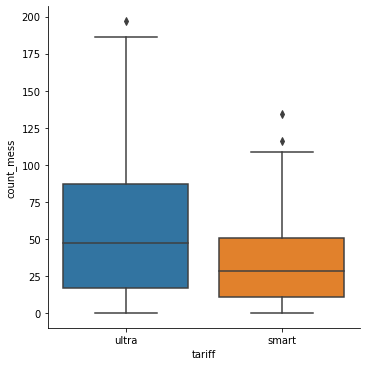

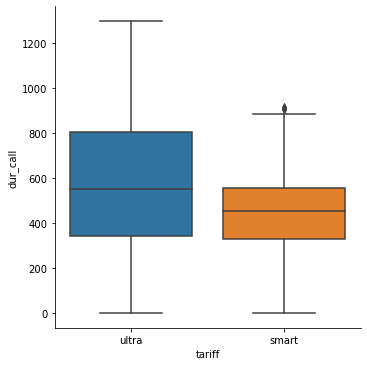

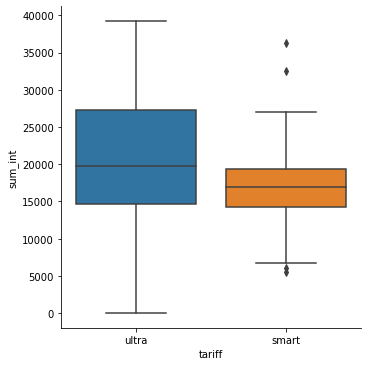

In [103]:
for column in ['count_mess', 'dur_call', 'sum_int']:    
    sb.catplot(x="tariff", y=column, kind="box", data=medians, orient='v')

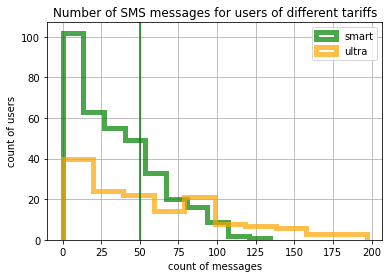

In [104]:
#plot histograms

ax = smart.plot(
    kind='hist',
    y='count_mess',
    histtype='step',
    linewidth=5,
    alpha=0.7,
    color='green',
    label='smart',
)
ultra.plot(
    kind='hist',
    y='count_mess',
    histtype='step',
    linewidth=5,
    alpha=0.7,
    label='ultra',
    ax=ax,
    color='orange',
    grid=True,
    legend=True,
    title='Number of SMS messages for users of different tariffs',
)
plt.xlabel('count of messages')
plt.ylabel('count of users')
plt.axvline(x=50, color='green', label='limit_smart');
#plt.axvline(x=1000, color='orange', label='limit_ultra');

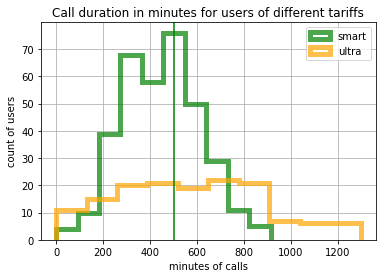

In [105]:
ax = smart.plot(
    kind='hist',
    y='dur_call',
    histtype='step',
    linewidth=5,
    alpha=0.7,
    color='green',
    label='smart',
)
ultra.plot(
    kind='hist',
    y='dur_call',
    histtype='step',
    linewidth=5,
    alpha=0.7,
    label='ultra',
    ax=ax,
    color='orange',
    grid=True,
    legend=True,
    title='Call duration in minutes for users of different tariffs',
)
plt.xlabel('minutes of calls')
plt.ylabel("count of users")
plt.axvline(x=500, color='green', label='limit_smart');
#plt.axvline(x=3000, color='orange', label='limit_ultra');

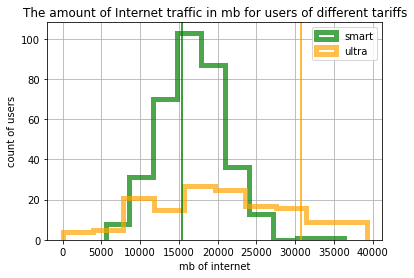

In [106]:
ax = smart.plot(
    kind='hist',
    y='sum_int',
    histtype='step',
    linewidth=5,
    alpha=0.7,
    color='green',
    label='smart',
)
ultra.plot(
    kind='hist',
    y='sum_int',
    histtype='step',
    linewidth=5,
    alpha=0.7,
    label='ultra',
    ax=ax,
    color='orange',
    grid=True,
    legend=True,
    title='The amount of Internet traffic in mb for users of different tariffs',
)
plt.xlabel('mb of internet')
plt.ylabel("count of users")
plt.axvline(x=15360, color='green', label='limit_smart');
plt.axvline(x=30720, color='orange', label='limit_ultra');

#### Description of distributions
1. The number of SMS messages for users of different tariffs is described by **Chi-square or χ2 (chi-square)** distribution. The histograms partially overlap each other, there is a cutoff peak on the left. The average value of the parameter is significantly to the left of the center of the range, especially for users of the smart tariff: more than 100 people on average write no more than 20 SMS per month; more than 100 SMS are written by up to 10 people per month. With regard to users of the ultra tariff, there are **2 peaks**: up to 40 people rarely use SMS (no more than 20 per month) and from 80 to 100 people write an average of 20 messages per month.
2. The duration of calls for smart tariff users is described by a distribution close to **normal**. The average value for the number of minutes is in the middle of the full swing range. The largest number of users also belongs to the average interval, more than 70 people spend on calls from 300 to 550 minutes per month. For ultra tariff users, the duration of calls is described according to the law **uniform, close to rectangular distribution**. The number of users talking on average up to 900 minutes per month does not change significantly (18-20 people each).
3. Using of the Internet by users of the smart tariff is distributed **normal**: the majority spends from 1.2 to 2 GB of Internet per month. Ultra users use the Internet more **uniform** and spend from 0.7 to 4 GB per month.

## Step 4. Test hypotheses
- the average revenue of users of the Ultra and Smart tariffs differ;
- the average revenue of users from Moscow differs from the revenue of users from other regions.

In [107]:
smart_users = total[total['tariff'] == 'smart']
ultra_users = total[total['tariff'] == 'ultra']

In [108]:
mean_rev_smart = smart_users.pivot_table(index='user_id', values=['revenue'], aggfunc='mean')
mean_rev_ultra = ultra_users.pivot_table(index='user_id', values=['revenue'], aggfunc='mean')

- HO: mean_rev_smart = mean_rev_ultra
- HA: mean_rev_ultra > mean_rev_smart

In [109]:
#Null hypothesis:
#average revenue of users of the "Ultra" is equal to the revenue of users "Smart"

alpha = 0.05 #critical level of statistical significance
    
results_tarif = st.ttest_ind(mean_rev_smart, mean_rev_ultra)
print('p-value:', results_tarif.pvalue)

if results_tarif.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

#Alternative hypothesis (one-sided):
#average revenue of users of the "Ultra" tariff is higher than the average revenue of users of the "Smart" tariff

mean_smart = mean_rev_smart.mean()
mean_ultra = mean_rev_ultra.mean()

mean_ultra > mean_smart

p-value: [3.94622627e-44]
Rejecting the null hypothesis


revenue    True
dtype: bool

In [110]:
moscow_users = total[total['city'] == 'Москва']
other_users = total[total['city'] != 'Москва']

In [111]:
mean_rev_moscow = moscow_users.pivot_table(index='user_id', values=['revenue'], aggfunc='mean')
mean_rev_other = other_users.pivot_table(index='user_id', values=['revenue'], aggfunc='mean')

- HO: mean_rev_moscow = mean_rev_other
- HA: mean_rev_moscow > mean_rev_other

In [113]:
#Null hypothesis:
#average revenue of users from Moscow is equal to the revenue of users from other regions

results_city = st.ttest_ind(mean_rev_moscow, mean_rev_other)
print('p-value:', results_city.pvalue)
if results_city.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')
print()

#Alternative hypothesis (one-sided):
#average revenue of users from Moscow is higher than the revenue of users from other regions

mean_moscow = mean_rev_moscow.mean()
mean_other = mean_rev_other.mean()

mean_moscow > mean_other

p-value: [0.39116949]
Failed to reject the null hypothesis



revenue    False
dtype: bool

1. Null hypothesis: average revenue of users of the "Ultra" is equal to the revenue of users "Smart" - **not confirmed**.
2. Alternative hypothesis (one-sided): average revenue of users of the "Ultra" tariff is higher than the average revenue of users of the "Smart" tariff - **confirmed**.
3. Null hypothesis: taverage revenue of users from Moscow is equal to the revenue of users from other regions - **confirmed**.
4. Alternative hypothesis (one-sided): average revenue of users from Moscow is higher than the revenue of users from other regions - **not confirmed**.

## Step 5. Write a general conclusion

## Conclusion
1.	Some users of the Smart tariff do not use SMS, most of them rarely send them. Users of the Ultra tariff also send some SMS and never go beyond the set limit.
2.	Some Smart users go beyond the established limit on the duration of calls per month (500 minutes) and speak up to 400 minutes more for an additional fee. Ultra users mostly talk for up to 900 minutes a month, some up to 1300 minutes, but do not exceed the set limit (3000 minutes).
3.	Internet traffic within the tariff (15 GB) is not enough for most Smart users, and most pay for extra 12 GB, and someone for extra 22 GB. Almost all Ultra users fit into the 30 GB tariff limit, the majority spend from 7 to 30 GB of Internet per month, very few pay extra for an additional 10 GB.
4.	The average revenue of users of the Ultra plan is higher than the average revenue of users of the Smart plan.
5.	The average revenue of users from Moscow is equal to the average revenue of users from other regions.
6.	More money is brought by the Ultra tariff, in addition to the tariff, users buy Internet traffic (up to 10 GB). Revenue from users of the Smart tariff is less, but there users more often resort to surcharges in excess of the tariff, which is three times (SMS and minutes) and one and a half times (Internet) more expensive than for users of the Ultra tariff. Users buy additional Internet traffic (up to 12 (22) GB!!!), additional SMS (up to 60 SMS messages), additional minutes (up to 400 minutes).